In [193]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Univariate Linear Regression

In the previous assignment you implemented the cost function and one step of gradient descent. Now it's time to put your code together and implement to full gradient descent algorithm. Please reuse the implementations of your functions from the previous assignment, but make sure they are correct. 

Make sure to comment your code!

In [194]:
#Make a prediction function h
#Theta is a vector of theta0 and theta1
def predict(x, theta):
    x_predict = theta[0] + theta[1]*x
    return x_predict

In [195]:
#Use the output of that function to compute the cost function J:
def cost(x_predict,y):
    sqerror = (x_predict - y)**2
    result = 1/(2 * x.size) * sqerror.sum()
    return result

In [196]:
#Create a function that returns the derivatives of the cost function for the different thetas
# given h (x_predict), theta, alhpa, y and x:
def gradDescentStep(x_predict, y, x):
    dtheta0 = (x_predict - y).sum() / x.size
    dtheta1 = ((x_predict - y) * x).sum() / x.size
    return (dtheta0, dtheta1)

In [197]:
#Set a number of default parameters (learning rate, number of iterations, theta)
alpha = 0.01
iterations = 1000
theta = numpy.array([0, 1]) #sets theta0 to 0 and theta1 to 1

#Fill in the stopcondition yourself
stopcondition = 0

#Generate the data
a = 0.5
b = 2
m = 100
x = linspace(0,10,m)
y = a * x + b + 0.3 * random.randn(m)


[ 1.82896645  0.5176467 ]


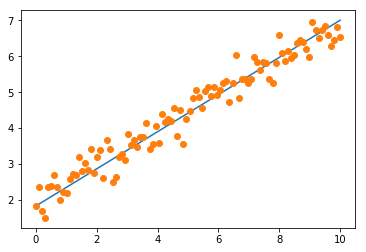

0.053755830473


In [198]:
#Create empty array for all the theta values that will be generated after each step
theta_values = numpy.empty([iterations + 1, 2])
#Set the first row equal to the initial theta set in the cell above
theta_values[0] = theta
#Set variable named costc to the cost with these initial theta values
costc = cost(predict(x, theta_values[0]), y)

#Loop a number of times (set in iterations) or until the cost is smaller or equal to the stopcondition set above
i = 0
while (i < iterations) and (costc > stopcondition):
    #Get the derivatives from the gradDescentStep function
    dthetas = gradDescentStep(predict(x, theta_values[i]), y, x)
    
    #Update the theta values using these derivatives, the learning rate alpha and the previous value of that theta
    theta0 = theta_values[i, 0] - alpha * dthetas[0]
    theta1 = theta_values[i, 1] - alpha * dthetas[1]
    theta_values[i+1] = numpy.array([theta0, theta1])
    
    #Set the costc variable equal to the cost with the new theta values
    costc = cost(predict(x, theta_values[i+1]), y)
    i = i + 1

#Print the values of the final thetas after all of the iterations
print(theta_values[iterations])

#Plot the data and the hypothesis function using the final thetas of the previous line
plt.plot(x,predict(x,theta_values[iterations]))
plt.plot(x,y,'o')
plt.show()

#Print the cost of the hypothesis with the final thetas
print(costc)

#The history of theta values can be seen in the theta_values matrix

## Analysis

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.